<a href="https://colab.research.google.com/github/vishnubanna/learningmachinelearning/blob/master/myOwnMultiPercptronNuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use numpy to use arrays as matricies

In [0]:
import numpy as np

a = np.zeros([3,2])
#print(a)

a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12

print(a)

print(a[0,1])
v = a[1,0]

print(v)
#print(a[0,2])

a = np.random.rand(3,3) #--> matrix of 3,3 size of random numbers btwn 0 and 1
print(a)

# a = a - 1# subtracts all numbers by 1
# print(a)

# a = np.random.rand(3,3) - 0.5 #--> matrix of 3,3 size or random numbers - o.5 shifts the wieghts to be both positive and negative  
# print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]
2.0
9.0
[[0.958192   0.86802075 0.52242633]
 [0.79510892 0.70358445 0.6894447 ]
 [0.94619917 0.19987554 0.72639138]]


matplotlib can be used to plot arrays and the info in the arrays

[[0.37774628 0.31732006 0.37887997]
 [0.83505542 0.00602516 0.9019163 ]
 [0.53712943 0.99058312 0.80694161]]


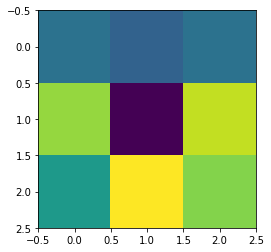

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

a = np.random.rand(3,3) #--> matrix of 3,3 size of random numbers btwn 0 and 1
print(a)
plt.imshow(a, interpolation="nearest") #interpolation = nearest tell ths computer not to blend color 

In [0]:
from math import *
import scipy.special 


class NeuralNetwork:
    def __init__(self, inputs, hiddens, outputs, layers, learning_rate):
        #init the network
        self.inodes = inputs 
        self.hnodes = hiddens
        self.onodes = outputs
        self.layers = layers
        #self.sigmoid = lambda x: 1/(1+exp(-x))
        self.sigmoid = lambda x: scipy.special.expit(x)
        self.MSE = lambda x, label: (label - x)**2
        
        self.lr = learning_rate
        
#         self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
#         self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        pass
    

    def train(self, train_set, target_set):
        #convert input and target list into 2d arrays
        inputs = np.array(train_set, ndmin = 2).T 
        #print(inputs)
        targets = np.array(target_set, ndmin = 2).T #ndmin = minimum number of dimentions in the new array
        #.T = transpose
        ih_wdot = np.dot(self.wih, inputs)
        
        ih_output = np.array([self.sigmoid(value) for value in ih_wdot ])
        #gives you the anser from the output nodes after being given the input
        #print(ih_wdot)
        #print(ih_output)
        
        ho_wdot = np.dot(self.who, ih_output)
        ho_output = np.array([self.sigmoid(value) for value in ho_wdot ])
        #print(ho_wdot)
        #print(ho_output)

        op_error = (targets - ho_output)
        error_ho =  np.dot(self.who.T, op_error)
        #error_ih =  np.dot(self.wih.T, error_ho)
        
        dw_ho = self.lr * np.dot(op_error * ho_output * (1 - ho_output), ih_output.T)
        dw_ih = self.lr * np.dot(error_ho * ih_output * (1 - ih_output), inputs.T)
        #train:refine the wieghts after being given a traing set example
        
        self.who = self.who + dw_ho
        self.wih = self.wih + dw_ih
        pass
    
    def query(self, inputs):
        
        inputs = np.array(inputs, ndmin = 2).T
        ih_wdot = np.dot(self.wih, inputs)
        
        ih_output = np.array([self.sigmoid(value) for value in ih_wdot ])
        #gives you the anser from the output nodes after being given the input
        print(ih_wdot)
        print(ih_output)
        
        ho_wdot = np.dot(self.who, ih_output)
        ho_output = np.array([self.sigmoid(value) for value in ho_wdot ])
        print(ho_wdot)
        print(ho_output)
        return (ho_output)
    
    def printe(self):
        print(self.wih)
        print(self.who)
        pass
    

In [0]:
input_size = 784
n = NeuralNetwork(input_size, 1024, 10, 1, 0.3)
n.printe()

input1 = np.random.rand(1,input_size)
input2 = np.random.rand(2,input_size)
output = np.random.rand(2,10)

#output = 
print(output)

[[-0.00779247 -0.02649462  0.0562146  ... -0.03632979 -0.0134599
  -0.04440122]
 [-0.00629312  0.00743644  0.02550294 ... -0.026091    0.04975518
   0.03964759]
 [ 0.04275577 -0.01867051 -0.02402109 ... -0.03911389  0.05625861
   0.03433683]
 ...
 [-0.02545471 -0.05315346  0.04555432 ... -0.03769633 -0.00914666
   0.01925184]
 [ 0.00761537  0.08765583  0.05661441 ...  0.02779328 -0.13035529
  -0.05703051]
 [ 0.03980453  0.03279524 -0.00823044 ... -0.02172625  0.01724622
   0.01069076]]
[[-1.45230653e-02 -3.34720139e-03  1.79613733e-02 ... -2.78282523e-02
   1.94598305e-03 -8.11855005e-02]
 [ 1.54344437e-02  4.86242374e-02 -7.62310046e-03 ... -7.80390048e-03
   7.93490872e-03  2.18175752e-02]
 [ 2.66471973e-02  1.58199393e-02  1.46713810e-02 ... -1.12919815e-02
   2.17047198e-03  7.50147010e-03]
 ...
 [-2.70495365e-02 -8.42976983e-02 -5.13881296e-03 ...  6.11041740e-02
  -4.11733944e-02  1.74944305e-02]
 [ 3.09612635e-02  2.05783771e-02  5.43333195e-02 ...  3.41314245e-02
   4.57716959e

In [0]:
#input = [[0.37298079, 0.14116122, 0.85006551, 0.13425626, 0.62141436, 0.22597164, 0.06044884, 0.29831745, 0.8687268, 0.11688487]]
#print(input1)
#print('\n')
#n.query(input1)
import time
for i in range(10):
    n.train(input2, output)
    time.sleep(1)
    n.printe()

[[-0.00874215 -0.02782509  0.05889863 ... -0.03538429 -0.01239021
  -0.04275313]
 [-0.0064055   0.00039037  0.01613468 ... -0.03159956  0.04626928
   0.03044047]
 [ 0.04309194 -0.02551028 -0.03525052 ... -0.0454134   0.05204614
   0.02377521]
 ...
 [-0.02624012 -0.06486676  0.03285152 ... -0.04557353 -0.01382756
   0.00612943]
 [ 0.00697767  0.07994675  0.04883343 ...  0.02286725 -0.13321122
  -0.0652264 ]
 [ 0.03544219  0.02701883  0.00456967 ... -0.01710976  0.02233554
   0.0187185 ]]
[[-0.01561629 -0.00027526  0.02961729 ... -0.00616769  0.01590732
  -0.09220463]
 [ 0.00309418  0.03562906 -0.01747539 ... -0.02113627  0.00095868
  -0.00447384]
 [ 0.03110685  0.02976536  0.0334956  ...  0.02064183  0.02166779
   0.01037121]
 ...
 [-0.01836664 -0.06949955  0.01225971 ...  0.0896721  -0.02440906
   0.03660806]
 [ 0.02174453  0.00772128  0.04107343 ...  0.01306769 -0.00857759
   0.01605187]
 [ 0.00569679 -0.03130494 -0.03362595 ... -0.00253815 -0.01088086
  -0.07779429]]
[[-0.00874214 -0

In [0]:
class NeuralNetwork2:
    def __init__(self, inputs, outputs, hlayers, learning_rate):
        #init the network
        self.inodes = inputs 
        #self.hnodes = hiddens
        self.onodes = outputs
        self.layers = hlayers
        self.layerlen = len(self.layers)
        self.weights = []
        self.weight_names = []
        
        self.lr = learning_rate
        pass
    def initializer(self):
        self.layers.insert(0, self.inodes)
        self.layerlen = len(self.layers)
        self.layers.insert(self.layerlen, self.onodes)
        self.layerlen = len(self.layers)
        
        for i in range(1, self.layerlen):
            self.weights.append(np.random.normal(0.0, pow(self.inodes, -0.5), (self.layers[i], self.layers[i-1])))
            self.weight_names.append(i)
            
        print(self.weights)
        self.weight_names[0] = 'input -> hidden'
        self.weight_names[len(self.weight_names) - 1] = 'hidden -> output'
        print(self.weight_names)
            
        pass
    
    def printer(self):
        print(self.layers)
        pass
        
    def add(self, nodes):
        self.layers.append(nodes)
        self.hiddenlayers = len(self.layers)
        pass
    
    def train():
        #train:refine the wieghts after being given a traing set example
        pass
    
    def query():
        #gives you the anser from the output nodes after being given the input
        pass

In [0]:
n = NeuralNetwork2(3, 10, [3, 3, 3] , 0.3)
#n.add(3)
n.initializer()
n.printer()

[array([[-0.44186072, -0.37472376, -0.00085095],
       [-0.09829278,  0.10547386, -0.76641091],
       [ 0.45316237,  0.18939704, -0.72122867]]), array([[-0.68251844,  0.27646226, -0.40085557],
       [ 0.72100157,  1.27828488,  0.55182899],
       [ 0.19210237,  0.06018621,  0.65423527]]), array([[-0.93057011, -0.49589857,  1.16061072],
       [ 0.39938379, -1.18955813, -0.07374177],
       [-0.10490972,  0.76710616,  0.93991383]]), array([[ 1.36102699,  0.57906652, -0.19113083],
       [-0.10681543,  0.61640061,  0.13500915],
       [-0.53686839, -0.5422375 ,  0.78429126],
       [-0.06882307, -0.33175284,  0.00195483],
       [-0.20913803, -0.48453924, -0.46552549],
       [-0.80801779, -0.60681026, -1.11337207],
       [-0.04349056,  0.11637782,  0.02040909],
       [ 0.2548964 , -0.25070765,  0.18870933],
       [ 0.36185356, -0.52479698, -0.87256182],
       [ 0.14193317,  0.45478282, -0.26672984]])]
['input -> hidden', 2, 3, 'hidden -> output']
[3, 3, 3, 3, 10]
